# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' que é a conta total sem a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Visualizar as primeiras linhas para confirmar a criação da variável
print(tips.head())


   total_bill   tip     sex smoker  day    time  size  net_bill
0       16.99  1.01  Female     No  Sun  Dinner     2     15.98
1       10.34  1.66    Male     No  Sun  Dinner     3      8.68
2       21.01  3.50    Male     No  Sun  Dinner     3     17.51
3       23.68  3.31    Male     No  Sun  Dinner     2     20.37
4       24.59  3.61  Female     No  Sun  Dinner     4     20.98


In [3]:
# Regressão linear
model = smf.ols('tip ~ net_bill', data=tips).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        14:55:11   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

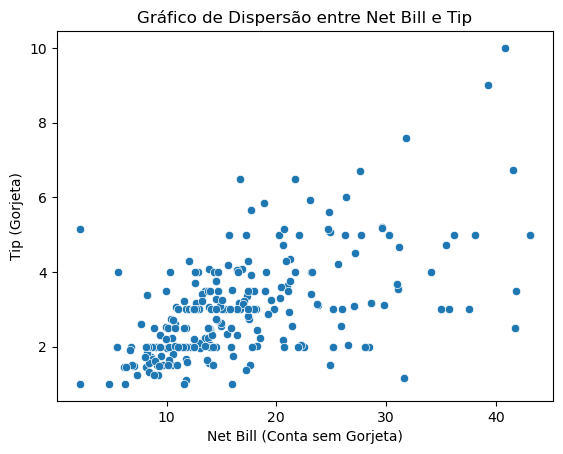

In [5]:
# Gráfico de dispersão
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.title('Gráfico de Dispersão entre Net Bill e Tip')
plt.xlabel('Net Bill (Conta sem Gorjeta)')
plt.ylabel('Tip (Gorjeta)')
plt.show()


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           1.52e-06
Time:                        14:56:37   Log-Likelihood:                -1015.7
No. Observations:                 244   AIC:                             2035.
Df Residuals:                     242   BIC:                             2042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5297      2.319     13.166      0.0

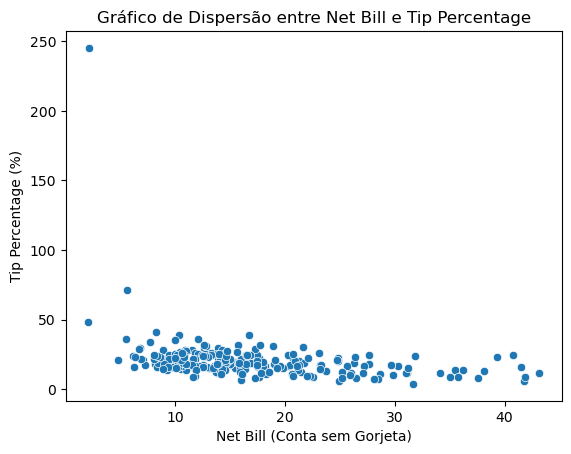

In [7]:
# Criar a variável 'tip_pct'
tips['tip_pct'] = 100 * tips['tip'] / tips['net_bill']

# Ajuste do modelo de regressão de 'tip_pct' por 'net_bill'
model_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(model_pct.summary())

# Gráfico de dispersão para 'tip_pct' e 'net_bill'
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.title('Gráfico de Dispersão entre Net Bill e Tip Percentage')
plt.xlabel('Net Bill (Conta sem Gorjeta)')
plt.ylabel('Tip Percentage (%)')
plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

- Comparar os R²s diretamente pode não ser ideal sem considerar o contexto das variáveis envolvidas e a natureza dos dados. Cada modelo fornece insights diferentes, e suas validades devem ser consideradas dentro dos objetivos específicos de cada análise e do comportamento subjacente dos dados.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [10]:
import statsmodels.api as sm

# Obter os valores preditos para 'tip_pct' do modelo ajustado anteriormente
tips['pred_tip_pct'] = model_pct.fittedvalues

# Calcular os valores preditos para 'tip' usando 'pred_tip_pct' e 'net_bill'
tips['pred_tip'] = (tips['pred_tip_pct'] / 100) * tips['net_bill']

# Calcular o R² do modelo ajustado para 'tip'
# Precisamos da soma dos quadrados total e residual para calcular o R²
SS_Residual = sum((tips['tip'] - tips['pred_tip'])**2)
SS_Total = sum((tips['tip'] - np.mean(tips['tip']))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
print("R² para o modelo ajustado de tip usando pred_tip_pct:", r_squared)

# Comparar esse R² com o do modelo original do item 1
print("R² do modelo original de tip por net_bill:", model.rsquared)


R² para o modelo ajustado de tip usando pred_tip_pct: 0.10889974845461348
R² do modelo original de tip por net_bill: 0.3325407312323705


Explicação:

    Valores Preditos (pred_tip_pct): São calculados a partir dos valores ajustados do modelo de regressão linear de tip_pct por net_bill.
    Conversão para tip (pred_tip): Usa a predição de tip_pct e o valor de net_bill para calcular a gorjeta em termos absolutos.
    Cálculo de R²: Compara a variância explicada pelo novo modelo com a variância total dos dados reais de tip para avaliar o quão bem o modelo se ajusta aos dados.